In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [3]:
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
x.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569L, 30L); no. positive: 357; no. negative: 212
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

In [5]:
cancer.data[:, 2]

array([ 122.8 ,  132.9 ,  130.  ,   77.58,  135.1 ,   82.57,  119.6 ,
         90.2 ,   87.5 ,   83.97,  102.7 ,  103.6 ,  132.4 ,  103.7 ,
         93.6 ,   96.73,   94.74,  108.1 ,  130.  ,   87.46,   85.63,
         60.34,  102.5 ,  137.2 ,  110.  ,  116.  ,   97.41,  122.1 ,
        102.4 ,  115.  ,  124.8 ,   77.93,  112.8 ,  127.9 ,  107.  ,
        110.1 ,   93.63,   82.61,   95.54,   88.4 ,   86.18,   71.9 ,
        128.3 ,   87.32,   85.42,  123.7 ,   51.71,   85.98,   78.04,
         86.91,   74.72,   87.21,   75.71,  120.3 ,   97.26,   73.34,
        125.5 ,   95.55,   82.61,   54.34,   64.55,   54.66,   96.42,
         59.2 ,   82.69,   97.4 ,   60.11,   71.8 ,   58.79,   81.37,
        123.6 ,   58.79,  114.2 ,   90.43,   79.19,  104.1 ,   87.91,
        120.2 ,  143.7 ,   83.19,   73.81,   86.49,  171.5 ,  129.1 ,
         76.95,  121.1 ,   94.25,  122.  ,   79.78,   95.77,   94.57,
        100.2 ,   84.74,   86.6 ,  100.3 ,  132.4 ,   77.79,   62.11,
         74.34,   94

In [9]:
pdata = pd.DataFrame(cancer.data[:, :10], columns=cancer.feature_names[:10])


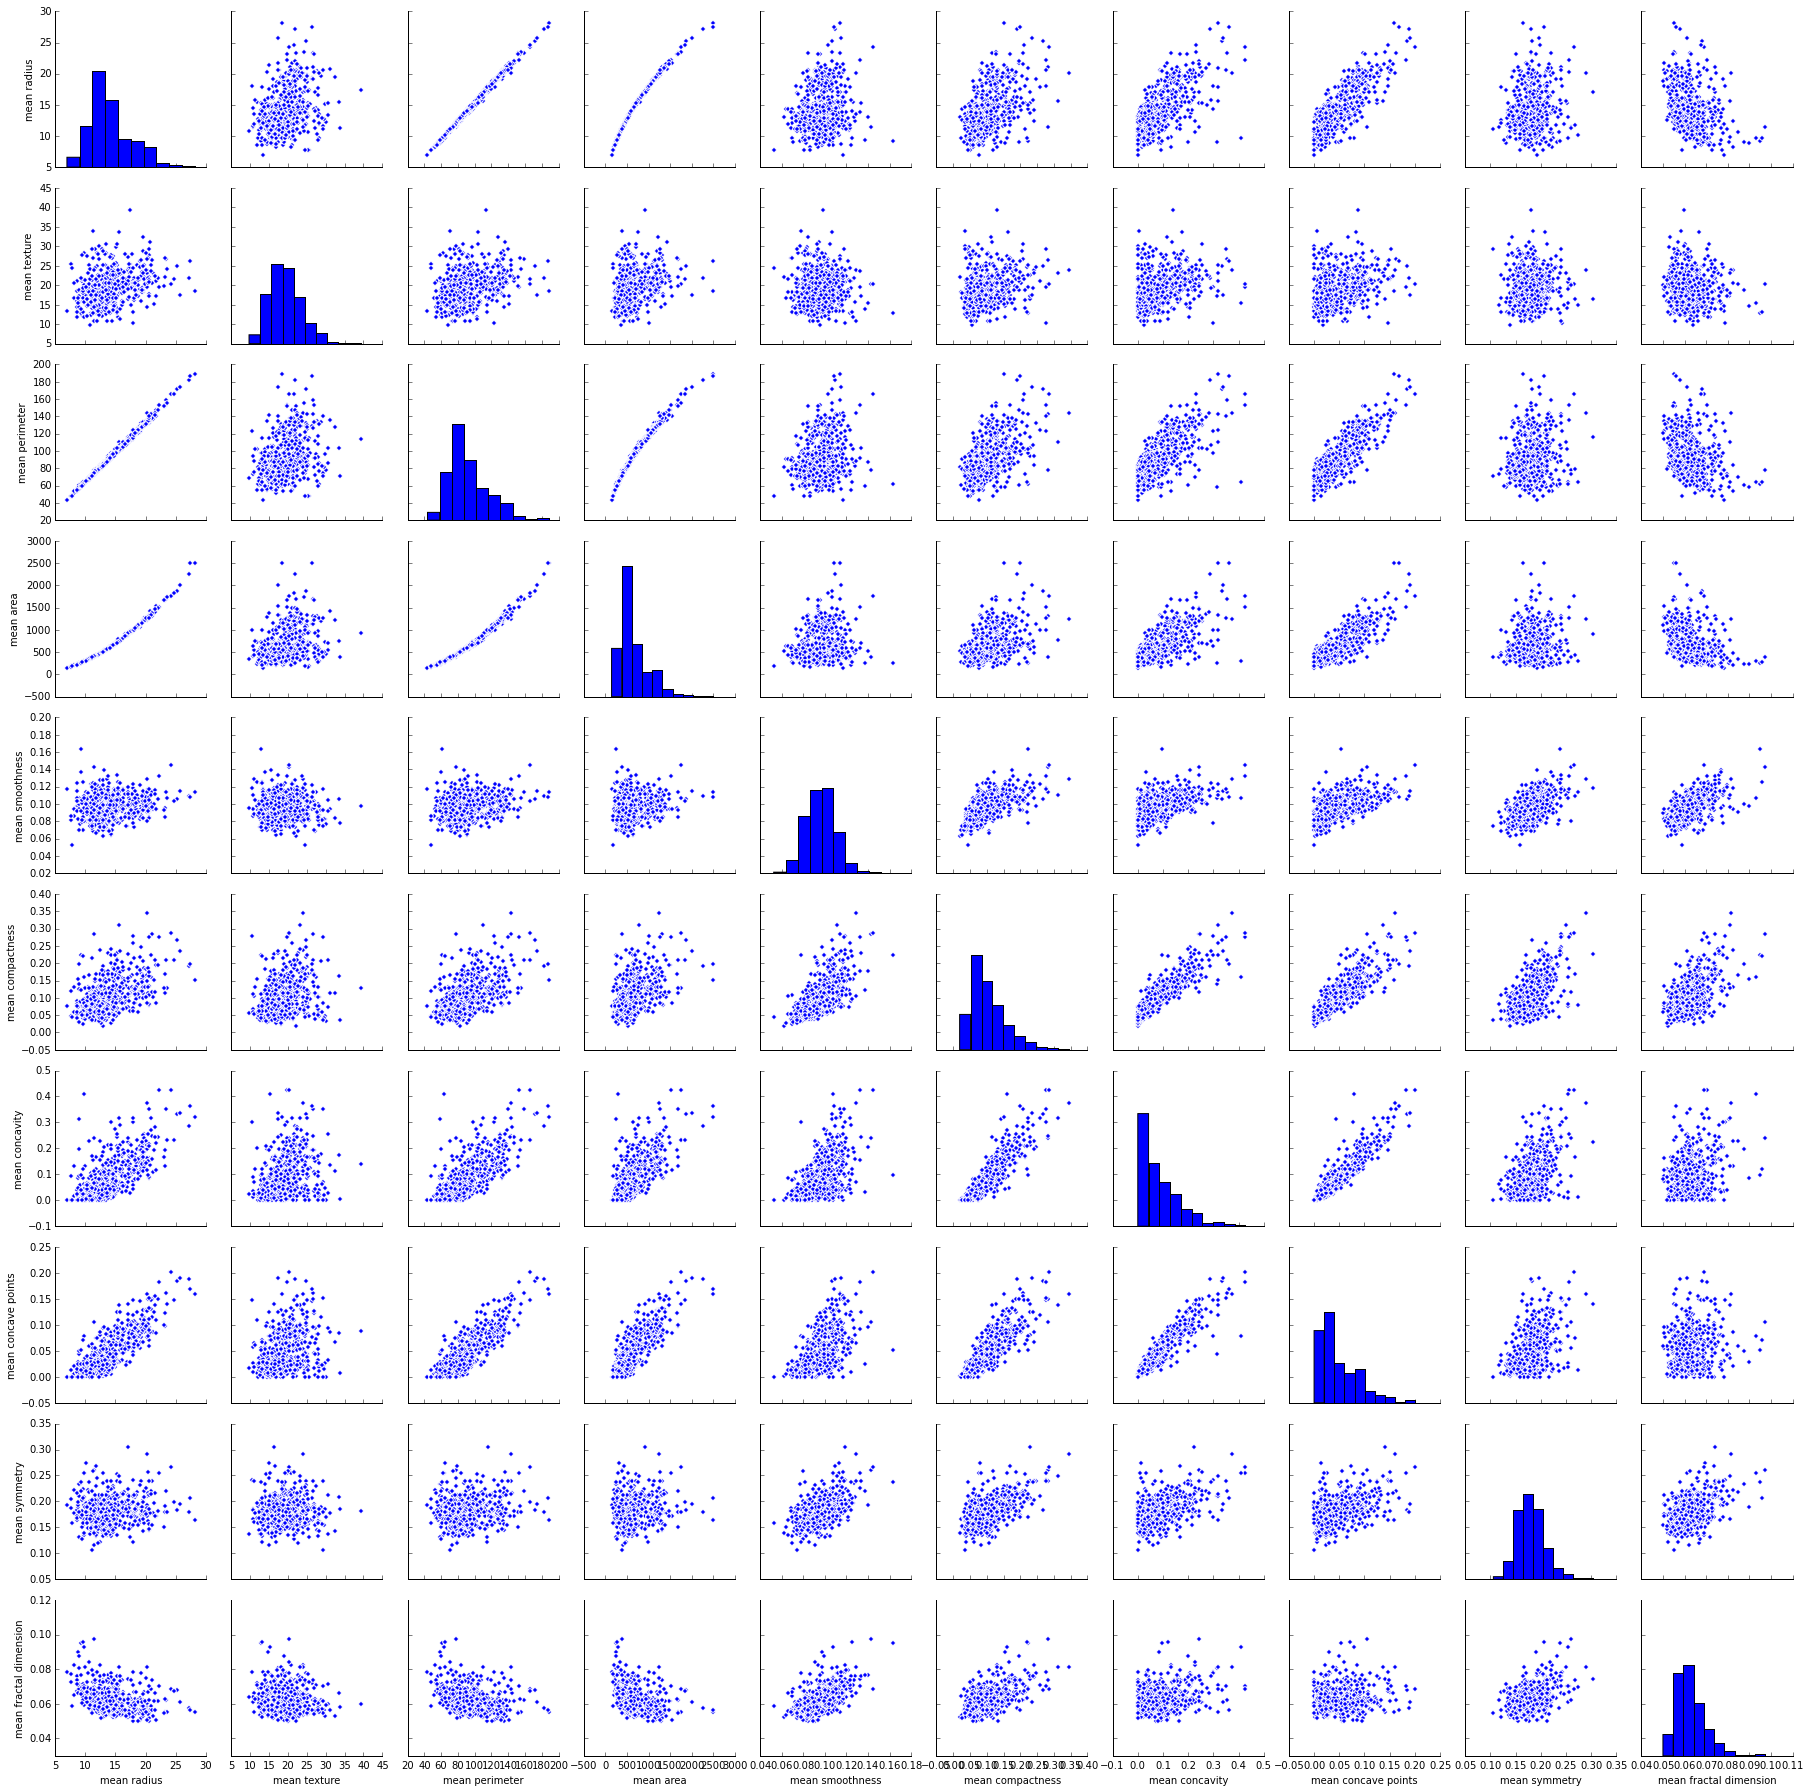

In [10]:
sns.pairplot(pdata)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.951648; test score: 0.964912


In [14]:
y_pred = model.predict(x_test)
print('matches: {0}/{1}'.format(
np.equal(y_pred, y_test).shape[0], y_test.shape[0]))

matches: 114/114


In [16]:
#找出预测概率低于90%的样本
y_pred_proba = model.predict_proba(x_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))

y_pred_proba_0 = y_pred_proba[:, 0] > 0.1
result = y_pred_proba[y_pred_proba_0]

y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [ 0.0016802  0.9983198]
[[ 0.82717471  0.17282529]
 [ 0.87723415  0.12276585]
 [ 0.12859706  0.87140294]
 [ 0.13878277  0.86121723]
 [ 0.14104059  0.85895941]
 [ 0.16933404  0.83066596]
 [ 0.24644256  0.75355744]
 [ 0.12713514  0.87286486]
 [ 0.31838478  0.68161522]
 [ 0.87559384  0.12440616]
 [ 0.53958997  0.46041003]
 [ 0.12533593  0.87466407]
 [ 0.15578733  0.84421267]
 [ 0.17039659  0.82960341]
 [ 0.17311186  0.82688814]
 [ 0.79381021  0.20618979]
 [ 0.73400307  0.26599693]
 [ 0.86855021  0.13144979]]


In [17]:
#optimization
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                            include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([
        ("ploynomial_feature", polynomial_features),
        ("logistic_regression", logistic_regression)
    ])
    
    return pipeline

In [37]:
import time

model = polynomial_model(degree=2, penalty='l1')
start = time.clock()
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
cv_score = model.score(x_test, y_test)
print('elapse: {0:.6f}; train score: {1:.6f}; cv score: {2:.6f}'.format(
    time.clock() - start,
    train_score,
    cv_score))

elapse: 0.379369; train score: 1.000000; cv score: 0.982456


In [38]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
        logistic_regression.coef_.shape,
np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1L, 495L); count of non-zero element: 105


In [39]:
from utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

elaspe: 28.518705


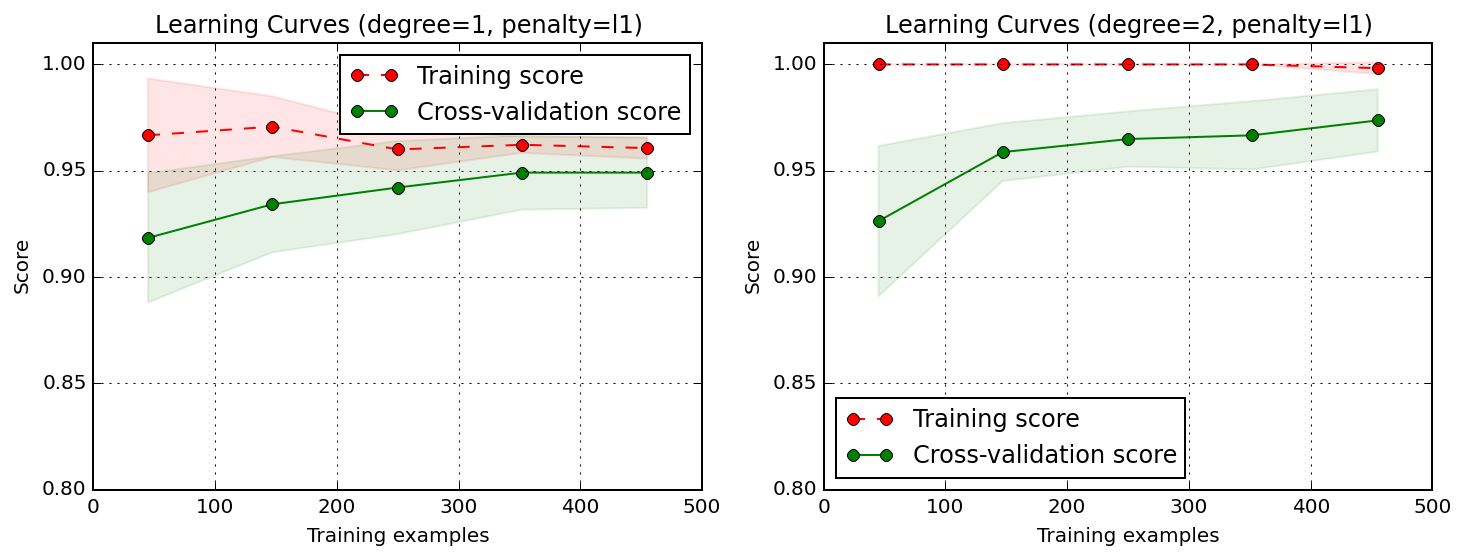

In [40]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty='l1'
start=time.clock()

plt.figure(figsize=(12, 4), dpi = 144)

for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(plt, 
                       polynomial_model(degree=degrees[i], penalty=penalty),
                       title.format(degrees[i], penalty),
                       x,
                       y,
                       ylim=(0.8, 1.01),
                       cv=cv)

print('elaspe: {0:.6f}'.format(time.clock() - start))

elaspe: 9.098837


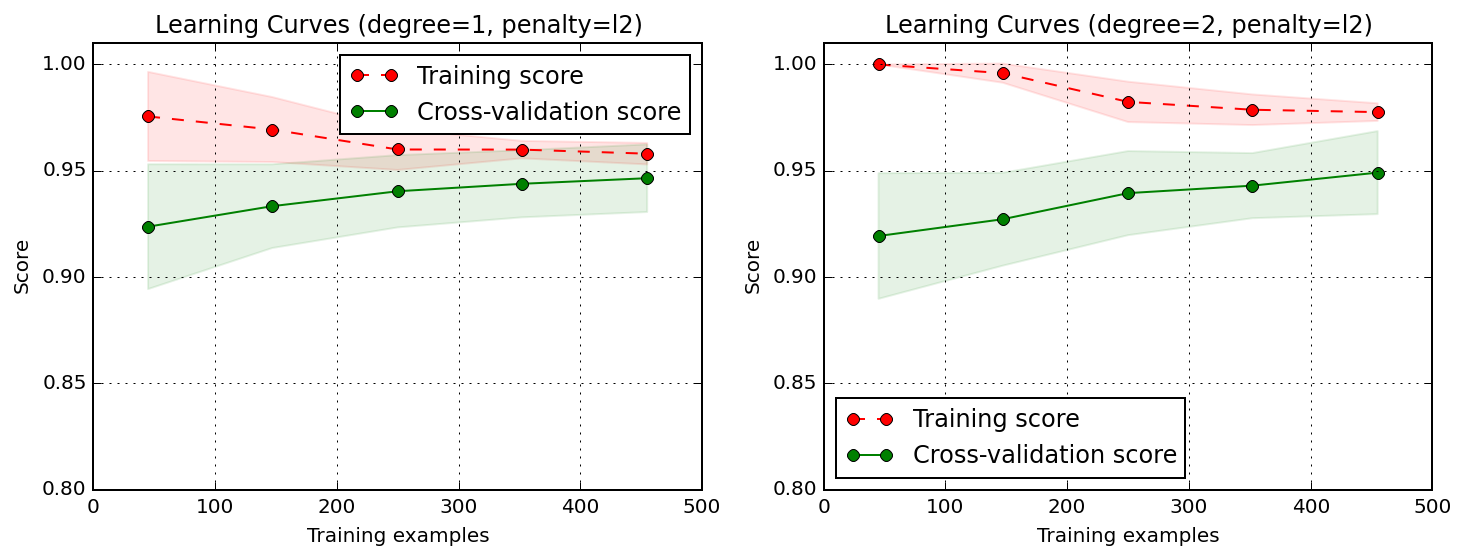

In [41]:
penalty='l2'
start=time.clock()

plt.figure(figsize=(12, 4), dpi = 144)

for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(plt, 
                       polynomial_model(degree=degrees[i], penalty=penalty),
                       title.format(degrees[i], penalty),
                       x,
                       y,
                       ylim=(0.8, 1.01),
                       cv=cv)

print('elaspe: {0:.6f}'.format(time.clock() - start))